In [12]:
import pandas as pd
import seaborn as sb
import numpy as np
import warnings
warnings.simplefilter("ignore")
import sklearn.metrics
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [13]:
dataset=pd.read_csv("test.csv")
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15725660,Male,30,87000,0
1,15652400,Female,38,50000,0
2,15776844,Male,35,75000,0
3,15738448,Female,30,79000,0
4,15638003,Female,35,50000,0


In [14]:
dataset.shape

(80, 5)

In [15]:
fileobject=open("Train.pkl","rb")
classifier=pickle.load(fileobject)
sc=pickle.load(fileobject)

In [16]:
#separate test data into x and y test data
x_test=dataset.iloc[:,[2,3]].values
y_test=dataset.iloc[:,4].values

In [17]:
x_test.shape,y_test.shape

((80, 2), (80,))

In [18]:
#transform test data by scaling object
x_test=sc.transform(x_test)

In [19]:
#predict the x test data
y_pred=classifier.predict(x_test)

In [20]:
#making the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[53  5]
 [ 2 20]]


In [21]:
#check accuracy for X train data
Acc_test=sklearn.metrics.precision_score(y_pred,y_test)*100
print(Acc_test)

90.9090909090909


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


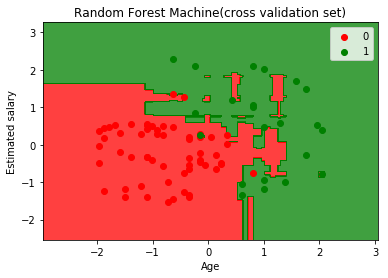

In [22]:
#visualizing the training set result
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
x_set,y_set=x_test,y_test
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                  np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01))
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
             alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],
                c=ListedColormap(('red','green'))(i),label=j)
plt.title('Random Forest Machine(cross validation set)')
plt.xlabel('Age')
plt.ylabel('Estimated salary')
plt.legend()
plt.show()